In [3]:
# GeoJSON
from shapely import from_geojson

geojson = """{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "name": "yurakucho"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    35.675056,
                    139.763333
                ]
            }
        },
        {
            "type": "Feature",
            "properties": {
                "name": "tokyo-kanda"
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [
                        35.681111,
                        139.766667
                    ],
                    [
                        35.691667,
                        139.770833
                    ]
                ]
            }
        }
    ]
}"""

geo_collection = from_geojson(geojson)
type(geo_collection)

shapely.geometry.collection.GeometryCollection

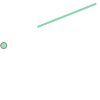

In [4]:
geo_collection

In [5]:
from shapely import to_geojson

print(to_geojson(geo_collection, indent=4))

{
    "type": "GeometryCollection",
    "geometries": [
        {
            "type": "Point",
            "coordinates": [
                35.675056,
                139.763333
            ]
        },
        {
            "type": "LineString",
            "coordinates": [
                [
                    35.681111,
                    139.766667
                ],
                [
                    35.691667,
                    139.770833
                ]
            ]
        }
    ]
}


In [7]:
from io import StringIO
import geopandas as gpd

geojson_gdf = gpd.read_file(StringIO(geojson))
geojson_gdf

,name,geometry
0,yurakucho,POINT (35.67506 139.76333)
1,tokyo-kanda,"LINESTRING (35.68111 139.76667, 35.69167 139.7..."


In [10]:
print(type(geojson_gdf.loc[0, "geometry"]))
print(type(geojson_gdf.loc[1, "geometry"]))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.linestring.LineString'>


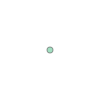

In [12]:
geojson_gdf.loc[0, "geometry"]

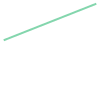

In [13]:
geojson_gdf.loc[1, "geometry"]

In [14]:
print(geojson_gdf.to_json(indent=4))

{
    "type": "FeatureCollection",
    "features": [
        {
            "id": "0",
            "type": "Feature",
            "properties": {
                "name": "yurakucho"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    35.675056,
                    139.763333
                ]
            }
        },
        {
            "id": "1",
            "type": "Feature",
            "properties": {
                "name": "tokyo-kanda"
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [
                        35.681111,
                        139.766667
                    ],
                    [
                        35.691667,
                        139.770833
                    ]
                ]
            }
        }
    ]
}


In [19]:
geojson_gdf.to_file("../result/yukakucho-kanda.json")

In [20]:
import json

with open("../result/yukakucho-kanda.json", mode="r", encoding="utf-8") as f:
    data = json.load(f)
print(data.keys())

dict_keys(['type', 'name', 'crs', 'features'])


In [22]:
# GeoTIFF
import rasterio

dataset = rasterio.open("../data/L03-b-14_5236.tif")
dataset

<open DatasetReader name='../data/L03-b-14_5236.tif' mode='r'>

In [23]:
dataset.bounds

BoundingBox(left=136.0, bottom=34.6666666336, right=137.0, top=35.3333333)

In [24]:
dataset.crs

CRS.from_wkt('GEOGCS["JGD2000",DATUM["Japanese_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257221999999,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6612"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4612"]]')

In [26]:
dataset.indexes

(1,)

In [27]:
dataset.read(1)

array([[ 10,  10,  10, ...,  50,  50,  50],
       [ 10,  10,  10, ...,  50,  50,  50],
       [ 10,  10,  10, ...,  50,  50,  50],
       ...,
       [ 50,  50,  50, ..., 150, 150, 150],
       [ 50,  50,  50, ..., 150, 150, 150],
       [ 50,  50,  50, ..., 150, 150, 150]], shape=(800, 800), dtype=uint8)

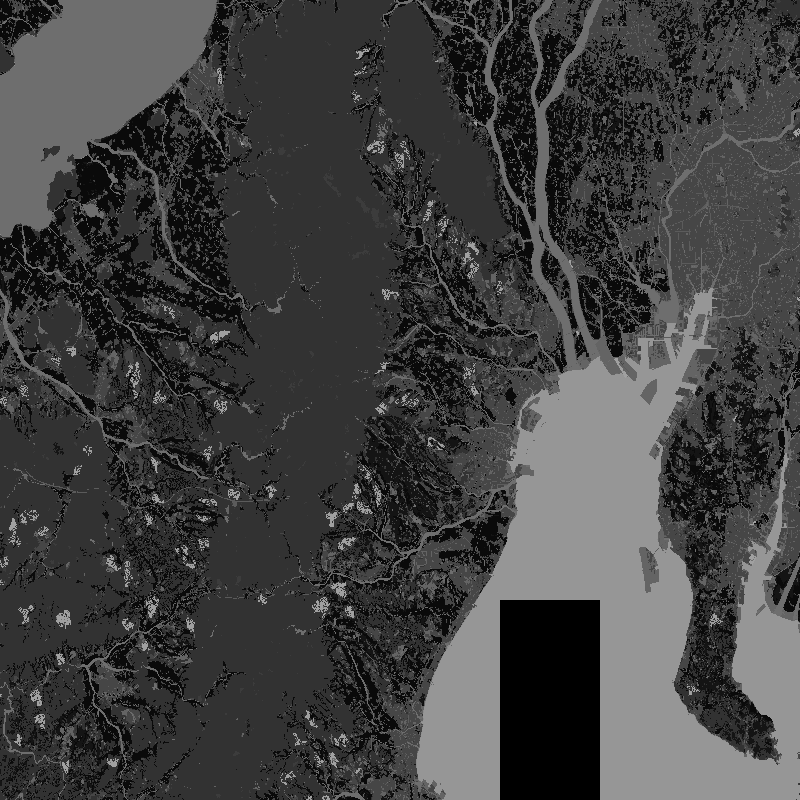

In [28]:
from PIL import Image

Image.fromarray(dataset.read(1))